In [16]:
import joblib

model = joblib.load("pet_adoption_model_1.pkl")
standard_scaler = joblib.load("scalar.pkl")

In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score

file_path = r"D:\Programming\Projects\Pet_Adoption_Model\Data\x_test_data.csv"
X_test = pd.read_csv(file_path)

X_test = standard_scaler.transform(X_test)

true_file_path = r"D:\Programming\Projects\Pet_Adoption_Model\Data\y_test_data.csv"
y_value = pd.read_csv(true_file_path)
y_test = y_value.squeeze()

y_predict = model.predict(X_test)
# y_predict

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9518518518518518


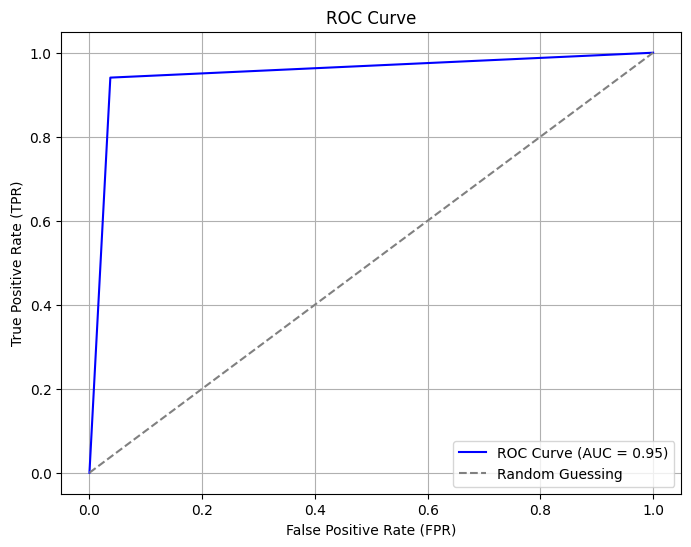

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_predict)

auc = roc_auc_score(y_test, y_predict)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

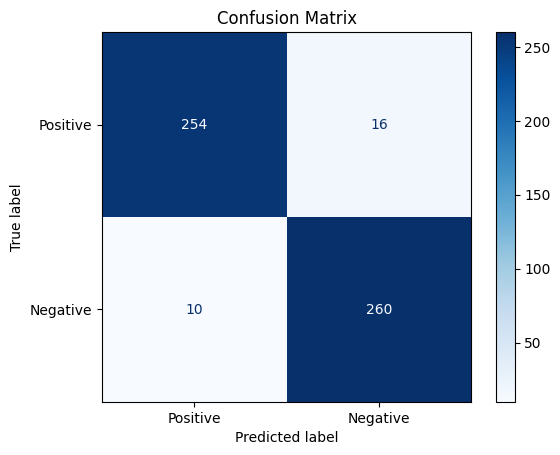

<Figure size 640x480 with 0 Axes>

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict, labels=[1,0])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
plt.savefig("Confusion Matrix")